# Multiple Hobo analysis

## Import packages

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import pandas as pd
import os

## Import raw data

In [50]:
raw_data_dict={}

for filename in os.listdir():
    
    if filename.endswith('.csv'):
        
        print(filename)
        df=pd.read_csv(filename,skiprows=1)
        time_zone=df.columns[1]
        df=pd.read_csv(filename,skiprows=1,parse_dates=[time_zone])
        
        raw_data_dict[filename]=df
        
#raw_data_dict

Correct.csv
Sensor1.csv
sensor1_ben.csv
Sensor2.csv


In [51]:
len(raw_data_dict)

4

In [53]:
raw_data_dict.keys()

dict_keys(['Correct.csv', 'Sensor1.csv', 'sensor1_ben.csv', 'Sensor2.csv'])

In [54]:
raw_data_dict['sensor1_ben.csv'].head()

,#,"Date Time, GMT+00:00","Temp, °F (LGR S/N: 10469238, SEN S/N: 10469238)",Coupler Attached (LGR S/N: 10469238),Host Connected (LGR S/N: 10469238),Stopped (LGR S/N: 10469238),End Of File (LGR S/N: 10469238)
0,1,2014-03-31 07:00:00,69.622,NaN,NaN,NaN,NaN
1,2,2014-03-31 07:30:00,69.622,NaN,NaN,NaN,NaN
2,3,2014-03-31 08:00:00,69.449,NaN,NaN,NaN,NaN
3,4,2014-03-31 08:30:00,69.622,NaN,NaN,NaN,NaN
4,5,2014-03-31 09:00:00,69.964,NaN,NaN,NaN,NaN


## Clean up data

In [70]:
clean_data_dict={}

for filename,df in raw_data_dict.items():

    time_col=df.columns[1]
    #print(df.columns)
    data_col=[x for x in df.columns if x.startswith('Temp')][0]
    df1=df[[time_col,data_col]].copy()
    df1=df1.rename(columns={time_col:'DateTime',
                            data_col:'Temp'})
    df1=df1.dropna()
    
    if '°F' in data_col:
        df1['Temp']=(df1['Temp']-32)*5/9

    df1=df1.set_index('DateTime')

    clean_data_dict[filename]=df1

clean_data_dict['Correct.csv']

,Temp
DateTime,
2019-10-10 11:00:00,22.333
2019-10-10 11:05:00,22.525
2019-10-10 11:10:00,22.429
2019-10-10 11:15:00,22.525
2019-10-10 11:20:00,22.525
2019-10-10 11:25:00,22.238
2019-10-10 11:30:00,21.378
2019-10-10 11:35:00,20.996
2019-10-10 11:40:00,20.805


PLOT_FILENAME: test.png


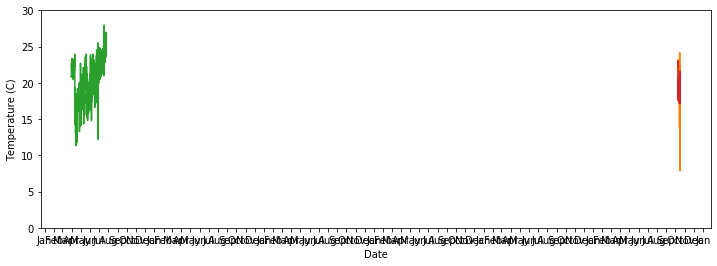

In [76]:
register_matplotlib_converters()
fig, ax = plt.subplots(1,figsize=(12,4))
for k,df in clean_data_dict.items():
    ax.plot(df)#,color='black',linewidth=0.5)
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylim([0,30])
ax.set_ylabel('Temperature (C)')
plot_filename=r'test.png'
print('PLOT_FILENAME: '+plot_filename)
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()

In [ ]:
df1['Temp']=(df1['Temp']-32)*5/9
df1=df1.set_index('DateTime')

In [42]:
l=[0,1,2]
l[1]

1

In [43]:
d={'item1':1,'item2':2}

In [44]:
d

{'item1': 1, 'item2': 2}

In [45]:
d['item2']

2

In [46]:
d['item44']=10

In [47]:
d

{'item1': 1, 'item2': 2, 'item44': 10}

In [48]:
for k,v in d.items():
    print(k,v)

item1 1
item2 2
item44 10


In [35]:
len(l)

4

In [37]:
l[1]

,#,"Date Time, GMT+01:00","Temp, °F (LGR S/N: 10456880, SEN S/N: 10456880)",Coupler Attached (LGR S/N: 10456880),Host Connected (LGR S/N: 10456880),Stopped (LGR S/N: 10456880),End Of File (LGR S/N: 10456880)
0,1,2019-10-10 12:00:00,70.651,NaN,NaN,NaN,NaN
1,2,2019-10-10 12:05:00,71.168,NaN,NaN,NaN,NaN
2,3,2019-10-10 12:10:00,71.856,NaN,NaN,NaN,NaN
3,4,2019-10-10 12:15:00,72.372,NaN,NaN,NaN,NaN
4,5,2019-10-10 12:20:00,72.718,NaN,NaN,NaN,NaN
5,6,2019-10-10 12:25:00,72.891,NaN,NaN,NaN,NaN
6,7,2019-10-10 12:30:00,73.062,NaN,NaN,NaN,NaN
7,8,2019-10-10 12:35:00,73.234,NaN,NaN,NaN,NaN
8,9,2019-10-10 12:40:00,73.234,NaN,NaN,NaN,NaN
9,10,2019-10-10 12:45:00,73.407,NaN,NaN,NaN,NaN


In [9]:
if 1>2:
    print('true')
else:
    print('false')

false


In [2]:
import os

for filename in os.listdir():
    
    print(filename)
    
    continue
    
    
    if filename.endswith(".asm") or filename.endswith(".py"): 
         # print(os.path.join(directory, filename))
        continue
    else:
        continue

.ipynb_checkpoints
Correct.csv
MultipleHoboAnalysis.ipynb
Sensor1.csv
sensor1_ben.csv
Sensor2.csv
